# Problem Description :

if __name__ == "__main__":

    parser = ArgumentParser()

    parser.add_argument(
        "--datadir",
        type=str,
        dest="datadir",
        help="Directory where the dataset is located",
        required=True,
    )
    parser.add_argument(
        "--scriptdir",
        type=str,
        dest="scriptdir",
        help="Directory where scripts are located",
        required=True,
    )
    parser.add_argument(
        "--latent-dim-1",
        type=int,
        dest="LATENT_DIM_1",
        help="number of neurons in the first hidden layer",
        required=True,
    )
    parser.add_argument(
        "--latent-dim-2",
        type=int,
        dest="LATENT_DIM_2",
        help="number of neurons in the second hidden layer",
        default=0,
    )
    parser.add_argument(
        "--kernel-size",
        type=int,
        dest="KERNEL_SIZE",
        help="width of the convolution kernel",
        default=0,
    )
    parser.add_argument(
        "--batch-size", type=int, dest="BATCH_SIZE", help="batch size", required=True
    )
    parser.add_argument("--T", dest="T", type=int, help="history length", required=True)
    parser.add_argument(
        "--learning-rate",
        type=float,
        dest="LEARNING_RATE",
        help="learning rate",
        required=True,
    )
    parser.add_argument(
        "--alpha",
        type=float,
        dest="ALPHA",
        help="regularization coefficient",
        required=True,
    )

    args = parser.parse_args()

    commondir = args.scriptdir

    sys.path.append(commondir)
    from utils import load_data
    from extract_data import extract_data

    # load data into Pandas dataframe
    data_dir = args.datadir
    if not os.path.exists(os.path.join(data_dir, "energy.csv")):
        extract_data(data_dir)

    energy = load_data(data_dir)

In [2]:
import findspark
findspark.init()

In [98]:
from pyspark.sql import SparkSession
def init_spark():
  spark = SparkSession.builder.appName("HelloWorld").getOrCreate()
  sc = spark.sparkContext
  return spark,sc
def main():
  spark,sc = init_spark()
  nums = sc.parallelize([1,2,3,4])
  print(nums.map(lambda x: x*x).collect())
if __name__ == '__main__':
  main()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 192.0 failed 1 times, most recent failure: Lost task 0.0 in stage 192.0 (TID 6755) (VAIO executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(DualStackPlainSocketImpl.java:135)
	at java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:409)
	at java.net.PlainSocketImpl.accept(PlainSocketImpl.java:199)
	at java.net.ServerSocket.implAccept(ServerSocket.java:545)
	at java.net.ServerSocket.accept(ServerSocket.java:513)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:174)
	... 14 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2261)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:180)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(DualStackPlainSocketImpl.java:135)
	at java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:409)
	at java.net.PlainSocketImpl.accept(PlainSocketImpl.java:199)
	at java.net.ServerSocket.implAccept(ServerSocket.java:545)
	at java.net.ServerSocket.accept(ServerSocket.java:513)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:174)
	... 14 more


### Importing the required packages
### Setting the current working directory and loading the files


In [130]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.formula.api as smf



# path = os.chdir("D:/consumer reviews of amazon products/")
path_dir = "D:/GI_RGI/"
GI_df = pd.read_excel(path_dir + "GI_data_modified.xls")
GI_df
# sales_data = pd.read_csv("Train.csv")
# holidays_data = pd.read_excel("Events_HolidaysData.xlsx")
# economic_data = pd.read_excel("MacroEconomicData.xlsx")
# weather_data_xlsx = pd.ExcelFile("WeatherData.xlsx")

,GI-Year Month,Material Desc,Material,Plant Name,Package,BE Technology,Crcy,Total Quantity,Total Amt [Crcy],Total ø price,TO Quantity,TO Amt incl. exp. [Crcy],TO ø price,Data Timestamp
0,2021-01,BAW CSSP CU,U39232U9682P810,1630 SIN,BW BAW,4 CSSP,EUR,300,509.99,1.699967,300,509.99,1.699967,2021-01-04
1,2021-01,BAW CSSP CU,U39242U4346P810S85,1630 SIN,BW BAW,4 CSSP,EUR,105000,35637.00,0.339400,105000,35637.00,0.339400,2021-01-04
2,2021-01,BAW CSSP CU,U39242U4346P810S85,1630 SIN,BW BAW,4 CSSP,EUR,160000,54304.00,0.339400,160000,54304.00,0.339400,2021-01-04
3,2021-01,BAW CSSP CU,U39242U4346P810S85,1630 SIN,BW BAW,4 CSSP,EUR,40000,13576.00,0.339400,40000,13576.00,0.339400,2021-01-04
4,2021-01,BAW CSSP CU,U39242U4346P810S85,1630 SIN,BW BAW,4 CSSP,EUR,10000,3394.00,0.339400,10000,3394.00,0.339400,2021-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,2021-06,CSSP GT,U39272U9941P810S 5,1630 SIN,SW Standard SAW,4 CSSP,EUR,345000,47178.52,0.136749,0,0.00,NaN,2021-02-22
65531,2021-06,CSSP GT,U39272U9946P810S 5,1630 SIN,SW Standard SAW,4 CSSP,EUR,15000,1000.92,0.066728,0,0.00,NaN,2021-02-22
65532,2021-06,CSSP GT,U39552U7523L210S 5,1630 SIN,SW Standard SAW,4 CSSP,EUR,5000,617.84,0.123568,0,0.00,NaN,2021-02-22
65533,2021-06,CSSP GT,U39552U7523L210S 5,1630 SIN,SW Standard SAW,4 CSSP,EUR,15000,1851.06,0.123404,0,0.00,NaN,2021-02-22


### Using Spark to read csv file

Time series are widely used for non-stationary data, like economic, weather, stock price, and retail & any companies/firms sales order data
I will demonstrate different approaches for forecasting sales orders in time series. Let’s get started!

C:\Users\kuosh\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\kuosh\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Statistics=9.965, p=0.007
Data does not look Gaussian (reject H0)
Product Package - BW BAW - Kurtosis of normal distribution: 1.3199509193224497
Product Package - BW BAW - Skewness of normal distribution: -1.45488358689383


C:\Users\kuosh\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\kuosh\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kuosh\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\kuosh\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a 

Statistics=8.454, p=0.015
Data does not look Gaussian (reject H0)
Product Package - SW Standard SAW - Kurtosis of normal distribution: 1.171590724183032
Product Package - SW Standard SAW - Skewness of normal distribution: -1.2950497988821443
Statistics=5.265, p=0.072
Data looks Gaussian (fail to reject H0)
Product Package - TC-SAW - Kurtosis of normal distribution: 0.38162093117962614
Product Package - TC-SAW - Skewness of normal distribution: -1.1176070448637576
Statistics=3.361, p=0.186
Data looks Gaussian (fail to reject H0)
Product Package - TF-BAW - Kurtosis of normal distribution: -0.20396953418331787
Product Package - TF-BAW - Skewness of normal distribution: 0.999825022379714


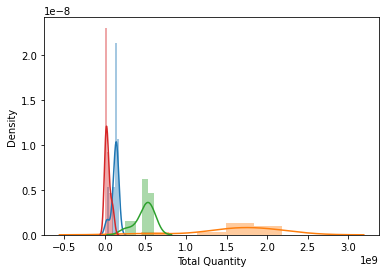

In [3]:
from scipy import stats
import seaborn as sns

product_sub_cat = GI_df['Package'].unique()
GI_Sales_Stats_Data = GI_df.copy()
GI_Sales_Stats_Data = GI_Sales_Stats_Data[['Package','Total Quantity','GI-Year Month']]
GI_Sales_Stats_Data['GI-Year Month'] = pd.to_datetime(GI_Sales_Stats_Data['GI-Year Month'])

for i in product_sub_cat:

    superstore_stats_df = GI_Sales_Stats_Data.loc[GI_Sales_Stats_Data['Package'] == i]
    stats_df = superstore_stats_df.groupby(superstore_stats_df['GI-Year Month'].dt.strftime('%Y-%m'))[['GI-Year Month','Total Quantity']].sum()

    stat, p = stats.normaltest(stats_df['Total Quantity'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')

    # We can also calculate Kurtosis and Skewness, to determine if the data distribution departs from the normal distribution.
    sns.distplot(stats_df['Total Quantity']);
    print( 'Product Package - ' + i + ' - Kurtosis of normal distribution: {}'.format(stats.kurtosis(stats_df['Total Quantity'])))
    print( 'Product Package - ' + i +  ' - Skewness of normal distribution: {}'.format(stats.skew(stats_df['Total Quantity'])))

In [106]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
path_dir = "D:/GI_RGI/"
print("Reading file as pysparks dataframe")
spark = SparkSession.builder.appName('Sales Forecasting of RF360 Product Categories').getOrCreate()
Spark_GI_df = spark.read.csv(path_dir + 'GI_data_modified.csv', header = True, inferSchema=True)
Sparks_GI_Category_Shipment = Spark_GI_df[['GI-Year Month','Package','Material','Material Desc','Total Quantity']]
Sparks_GI_Category_Shipment.show()

Reading file as pysparks dataframe
+-------------+-------+------------------+-------------+--------------+
|GI-Year Month|Package|          Material|Material Desc|Total Quantity|
+-------------+-------+------------------+-------------+--------------+
|      2021-01| BW BAW|   U39232U9682P810|  BAW CSSP CU|           300|
|      2021-01| BW BAW|U39242U4346P810S85|  BAW CSSP CU|        105000|
|      2021-01| BW BAW|U39242U4346P810S85|  BAW CSSP CU|        160000|
|      2021-01| BW BAW|U39242U4346P810S85|  BAW CSSP CU|         40000|
|      2021-01| BW BAW|U39242U4346P810S85|  BAW CSSP CU|         10000|
|      2021-01| BW BAW|U39242U4346P810S85|  BAW CSSP CU|         20000|
|      2021-01| BW BAW|U39242U4346P810S85|  BAW CSSP CU|           500|
|      2021-01| BW BAW|U39242U9604P810S 1|  BAW CSSP CU|         30000|
|      2021-01| BW BAW|U39242U9604P810S 1|  BAW CSSP CU|         15000|
|      2021-01| BW BAW|U39242U9604P810S 5|  BAW CSSP CU|          5000|
|      2021-01| BW BAW|   U39

In [10]:
from pyspark.sql.functions import month
Spark_GI_df_forecasting_pvt = Spark_GI_df.withColumn('Month', month(Spark_GI_df['GI-Year Month']))
Spark_GI_df_forecasting_pvt.show()


+-------------+-------------+------------------+----------+-------+-------------+----+--------------+----------------+------------+-----------+------------------------+-----------+--------------+----+----+----+-----+
|GI-Year Month|Material Desc|          Material|Plant Name|Package|BE Technology|Crcy|Total Quantity|Total Amt [Crcy]|Total ø pric|TO Quantity|TO Amt incl. exp. [Crcy]|  TO ø pric|Data Timestamp|_c14|_c15|_c16|Month|
+-------------+-------------+------------------+----------+-------+-------------+----+--------------+----------------+------------+-----------+------------------------+-----------+--------------+----+----+----+-----+
|      2021-01|  BAW CSSP CU|   U39232U9682P810|  1630 SIN| BW BAW|       4 CSSP| EUR|           300|          509.99| 1.699966667|        300|                  509.99|1.699966667|    2021/01/04|null|null|null|    1|
|      2021-01|  BAW CSSP CU|U39242U4346P810S85|  1630 SIN| BW BAW|       4 CSSP| EUR|        105000|         35637.0|      0.3394| 

BW BAW


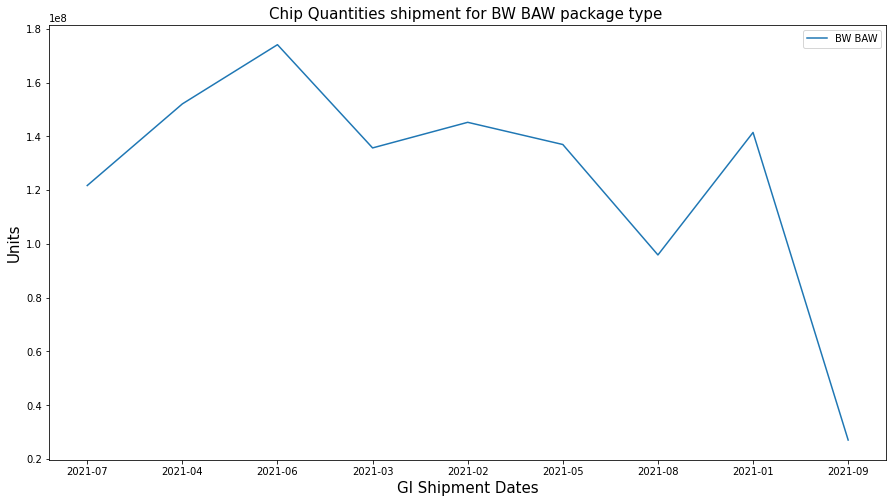

SW Standard SAW


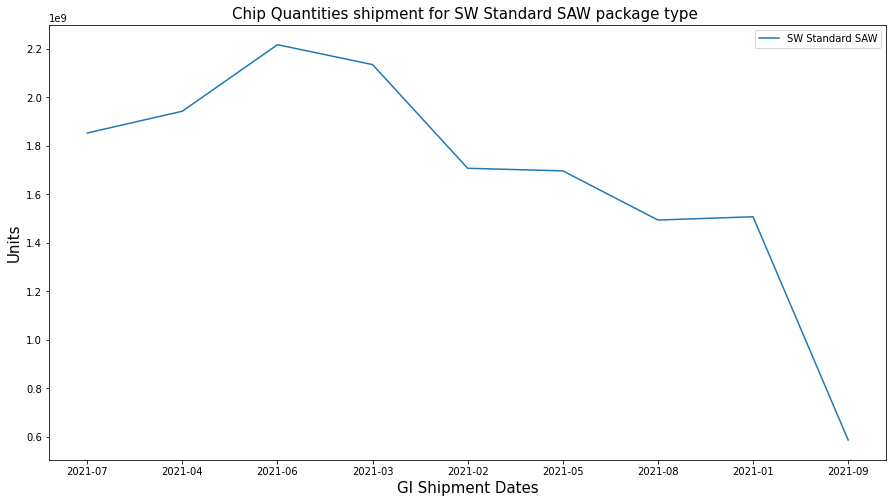

TC-SAW


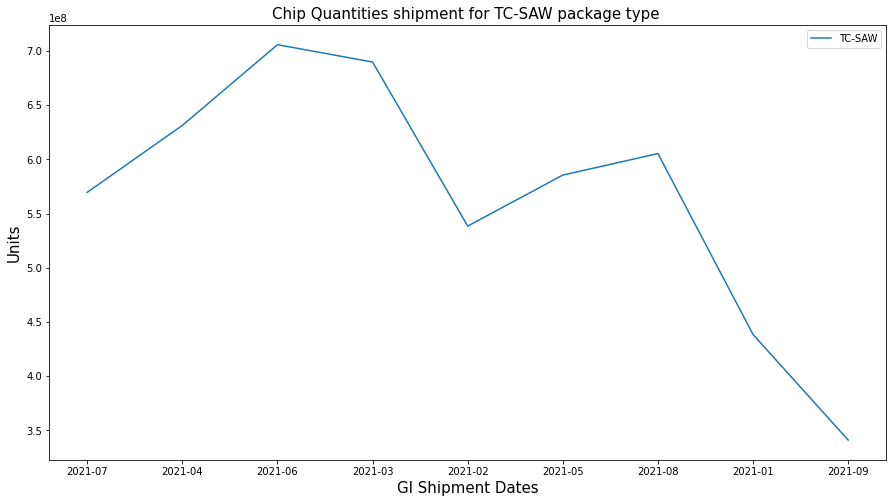

TF-BAW


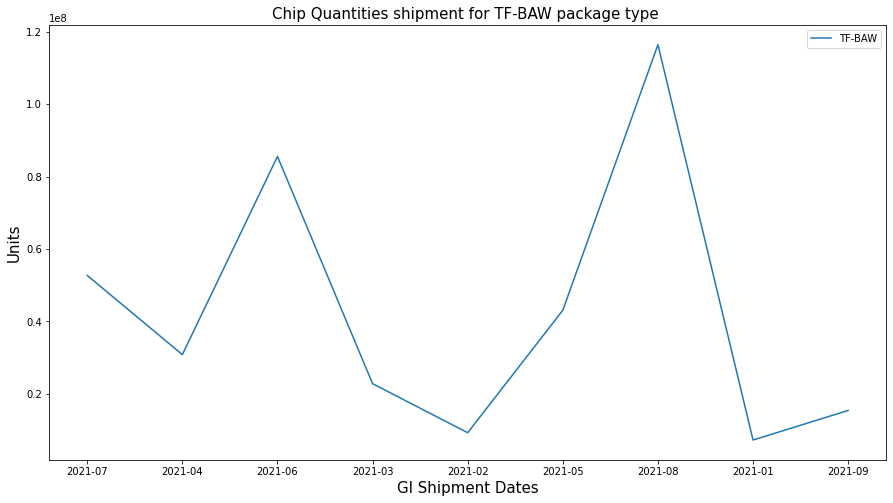

In [97]:
# Seaborn expects pandas dataframes and not spark dataframes. Change your code to:
# g1= sns.scatterplot( x= "events", y= "ways" , data = x2.toPandas())

# %config InlineBackend.figure_format = 'retina'
#
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
#
# %config InlineBackend.figure_format = 'png2x'
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png2x')
#
# set_matplotlib_formats('png')
# %config InlineBackend.figure_format = 'png'

from pyspark.sql.functions import mean, sum, max
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm

Sparks_GI_Category_Shipment = Spark_GI_df[['Package','Total Quantity','GI-Year Month']]
Sparks_product_sub_cat = Sparks_GI_Category_Shipment.toPandas()['Package'].unique()

# If you want the same result from Spark, i.e. an ndarray, use toPandas():
# s_df.toPandas()['k'].unique()

# Alternatively, if you don't need an ndarray specifically and just want a list of the unique values of column k:
# s_df.select('k').distinct().rdd.map(lambda r: r[0]).collect()

# Finally, you can also use a list comprehension as follows:
# [i.k for i in s_df.select('k').distinct().collect()]


for i in Sparks_product_sub_cat:
    fig, ax = plt.subplots(figsize=(15,8))
    Sparks_GI_Category_Shipment_df = Sparks_GI_Category_Shipment.filter(Sparks_GI_Category_Shipment['Package'] == i)
    # ax = (Sparks_GI_Category_Shipment_df.groupby(Sparks_GI_Category_Shipment_df['GI-Year Month'].dt.strftime('%Y-%m'))['Total Quantity'].sum().plot.bar(figsize=(15,6)))
    # x_labels = Sparks_GI_Category_Shipment_df.groupby('GI-Year Month').agg(mean('Total Quantity'))
    Shipment_df = Sparks_GI_Category_Shipment_df.groupby('GI-Year Month').agg(sum('Total Quantity')).select(['GI-Year Month', 'sum(Total Quantity)']).toPandas()
    ax.plot(Shipment_df['GI-Year Month'],Shipment_df['sum(Total Quantity)'], label=i)  # working fine
    ax.set_xlabel("GI Shipment Dates",fontsize=15)
    ax.set_ylabel("Units",fontsize=15)
    ax.set_title("Chip Quantities shipment for " +i+ " package type ",fontsize=15)
    plt.savefig(path_dir + "GI_Quantity_bar_plot_components_using Sparks "+i+".png")
    plt.legend()
    plt.show()

# def tsplot(y, lags, figsize=(12, 7), style='bmh', category=i):
#     """
#         Plot time series, its ACF and PACF, calculate Dickey–Fuller test
#
#         y - timeseries
#         lags - how many lags to include in ACF, PACF calculation
#     """
#
#     if not isinstance(y, pd.Series):
#         y = pd.Series(y)
#
#     with plt.style.context(style):
#         fig = plt.figure(figsize=figsize)
#         layout = (2, 2)
#         ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
#         acf_ax = plt.subplot2grid(layout, (1, 0))
#         pacf_ax = plt.subplot2grid(layout, (1, 1))
#
#         y.plot(ax=ts_ax)
#         p_value = sm.tsa.stattools.adfuller(y)[1]
#         ts_ax.set_title( i + ' - Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f} '.format(p_value))
#         smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
#         smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
#         plt.tight_layout()
#         fig.savefig(path_dir + "GI_Quantity_bar_autocorrelation_ "+i+".png")
#
# for cate in Sparks_product_sub_cat:
#     plt.subplots(figsize=(15,8))
#     Sparks_GI_Category_Shipment_df = Sparks_GI_Category_Shipment.loc[Sparks_GI_Category_Shipment['Package'] == cate]
#     ax = Sparks_GI_Category_Shipment_df.groupby(Sparks_GI_Category_Shipment_df['GI-Year Month'].dt.strftime('%Y-%m'))['Total Quantity'].sum()
#     tsplot(ax, lags=2, category=cate)



### Defining the Error Metric to be used

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# dic={0:'Weekend',1:'Weekday'}
# GI_df['Day'] = GI_df.weekday.map(dic)
# a=plt.figure(figsize=(9,4))
# plt1=sns.boxplot('year','Global_active_power',hue='Day',width=0.6,fliersize=3,
#                     data=GI_df)
# a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
# sns.despine(left=True, bottom=True)
# plt.xlabel('')
# plt.tight_layout()
# plt.legend().set_visible(False);

## 1.1 Sales Data

In [ ]:
print("Datatypes of each columns :")
print(GI_df.dtypes)


In [131]:
# Extracting the date and month from the 'MonthDate' column.
# superstoreSalesData.MonthDate = superstoreSalesData['Order Date'].astype(str).str[2:7]
GI_df['GI-Year Month'] = pd.to_datetime(GI_df['GI-Year Month'])

# Droping the column 'Order ID','Row ID','Order Priority'
# superstoreSalesData.drop('Order ID','Row ID','Order Priority', axis=1,inplace=True)
# GI_df.drop(['Plant Name', 'Crcy','Total ø price','TO Amt incl. exp. [Crcy]','TO ø price','TO Quantity'], axis='columns',inplace=True)
GI_df.drop(['Plant Name','Crcy','Total ø price','TO Amt incl. exp. [Crcy]','TO ø price','TO Quantity','Data Timestamp'], axis='columns',inplace=True)
GI_df

,GI-Year Month,Material Desc,Material,Package,BE Technology,Total Quantity,Total Amt [Crcy]
0,2021-01-01,BAW CSSP CU,U39232U9682P810,BW BAW,4 CSSP,300,509.99
1,2021-01-01,BAW CSSP CU,U39242U4346P810S85,BW BAW,4 CSSP,105000,35637.00
2,2021-01-01,BAW CSSP CU,U39242U4346P810S85,BW BAW,4 CSSP,160000,54304.00
3,2021-01-01,BAW CSSP CU,U39242U4346P810S85,BW BAW,4 CSSP,40000,13576.00
4,2021-01-01,BAW CSSP CU,U39242U4346P810S85,BW BAW,4 CSSP,10000,3394.00
...,...,...,...,...,...,...,...
65530,2021-06-01,CSSP GT,U39272U9941P810S 5,SW Standard SAW,4 CSSP,345000,47178.52
65531,2021-06-01,CSSP GT,U39272U9946P810S 5,SW Standard SAW,4 CSSP,15000,1000.92
65532,2021-06-01,CSSP GT,U39552U7523L210S 5,SW Standard SAW,4 CSSP,5000,617.84
65533,2021-06-01,CSSP GT,U39552U7523L210S 5,SW Standard SAW,4 CSSP,15000,1851.06


### 1.3.2 Numerical Variables

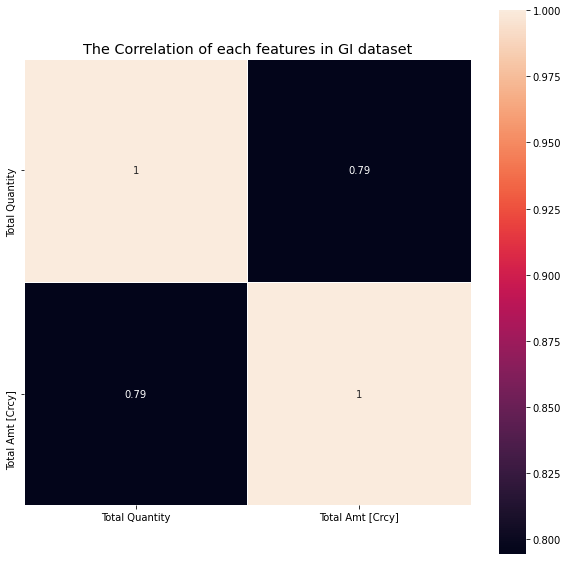

In [5]:
# Calculating the correlation of each variables
GI_df_correlation = GI_df.corr()


### Ploting the correlation 
%matplotlib inline
plt.figure(figsize =(10,10))
sns.heatmap(data= GI_df_correlation, annot =True, square= True,linewidths=.5)
plt.title('The Correlation of each features in GI dataset', fontsize= 'x-large')
plt.show()


<ipython-input-6-291d9289380a>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GI_Category_Shipment['GI-Year Month'] = pd.to_datetime(GI_Category_Shipment['GI-Year Month'])


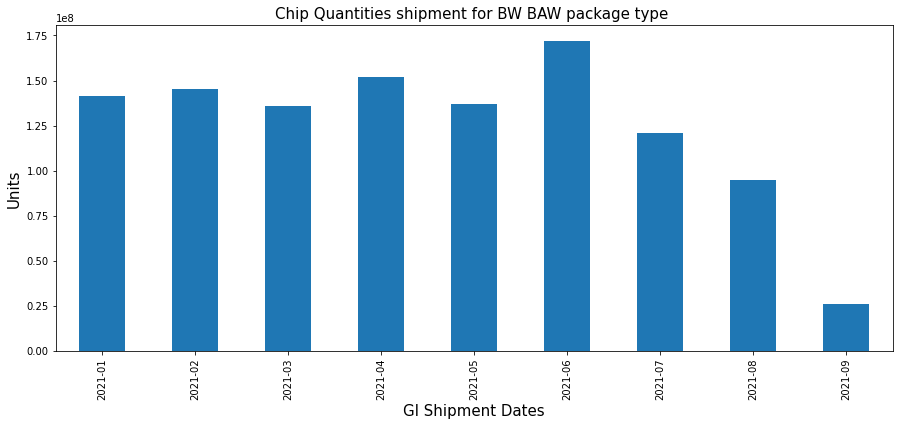

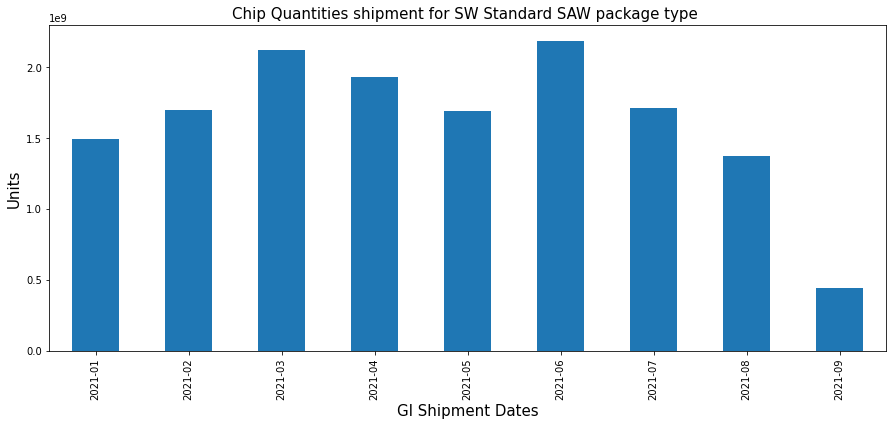

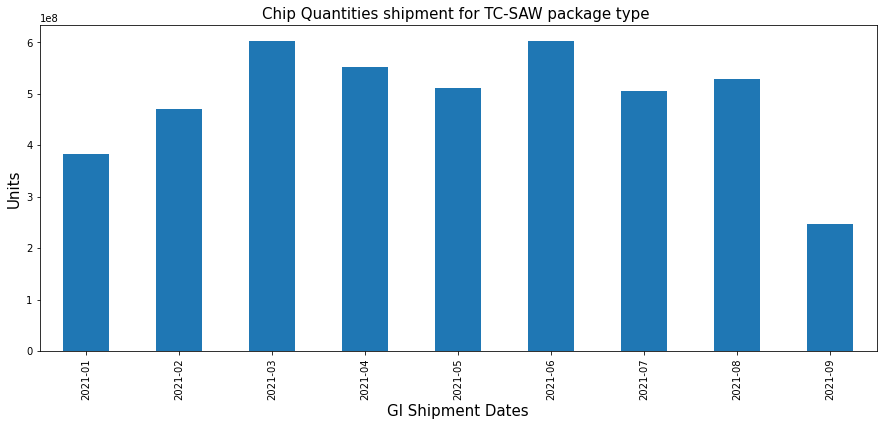

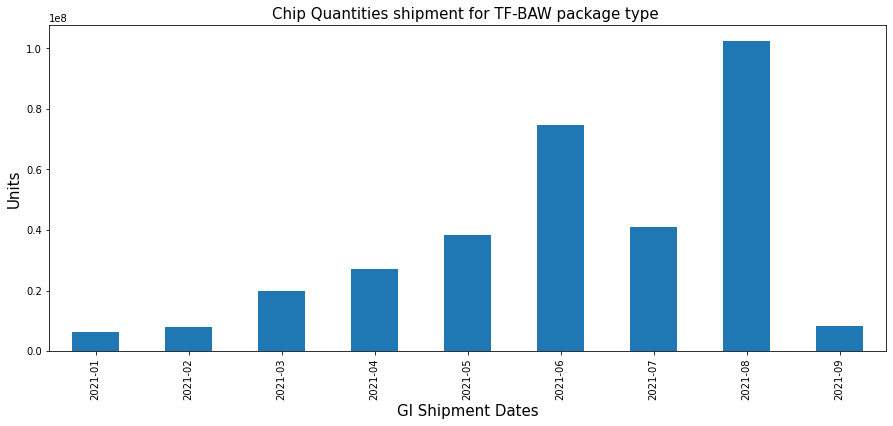

C:\Users\kuosh\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\kuosh\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\kuosh\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\kuosh\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: Fixe

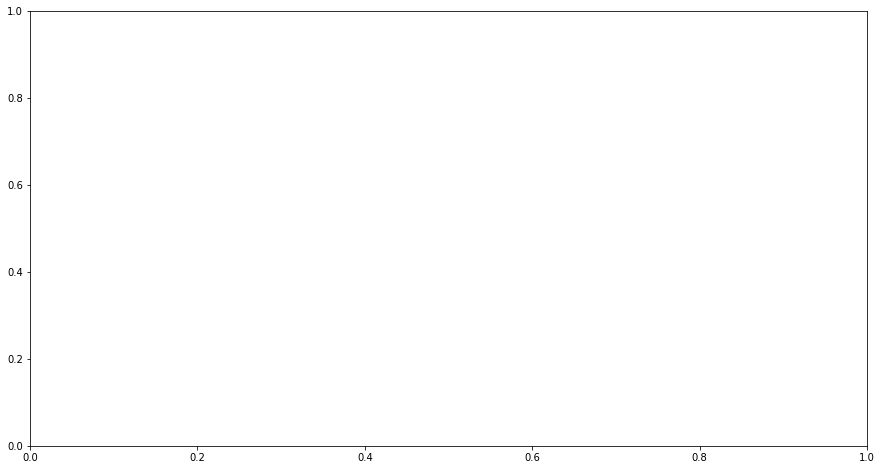

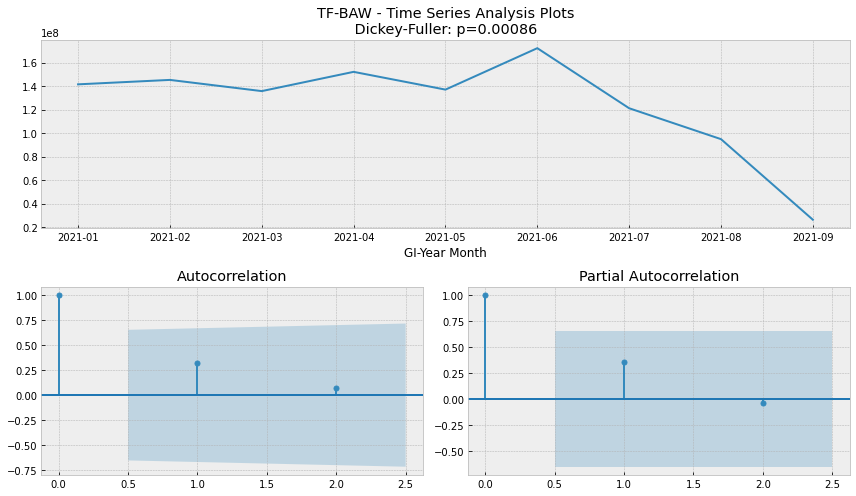

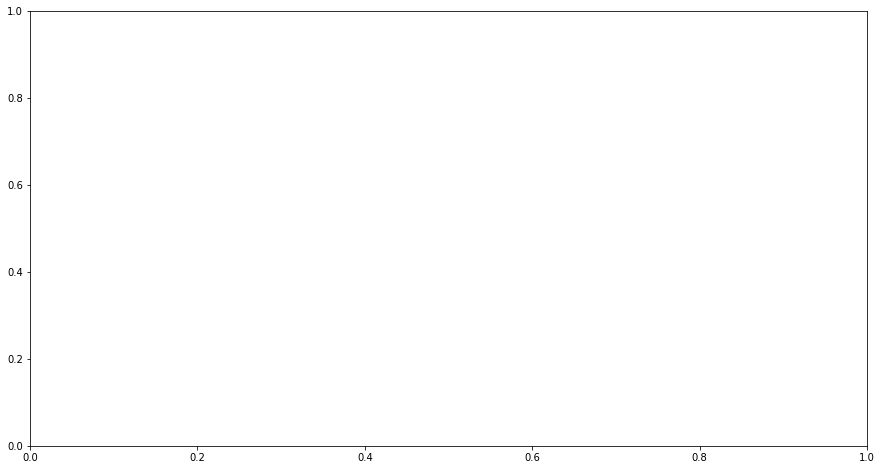

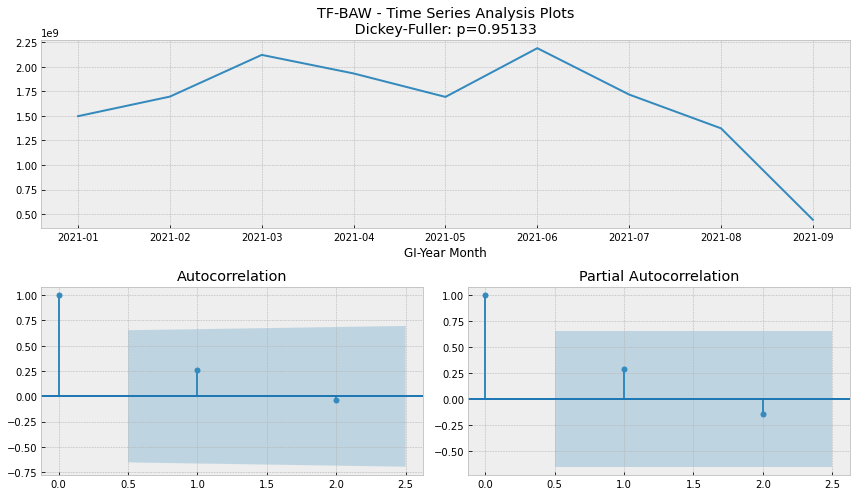

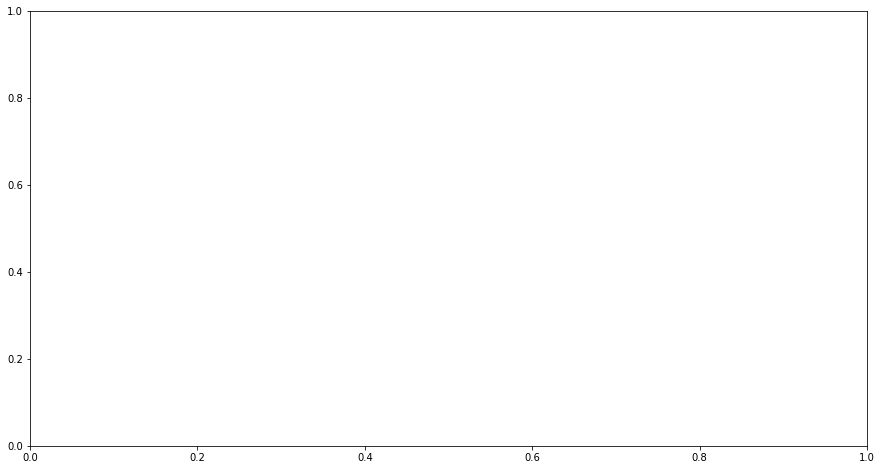

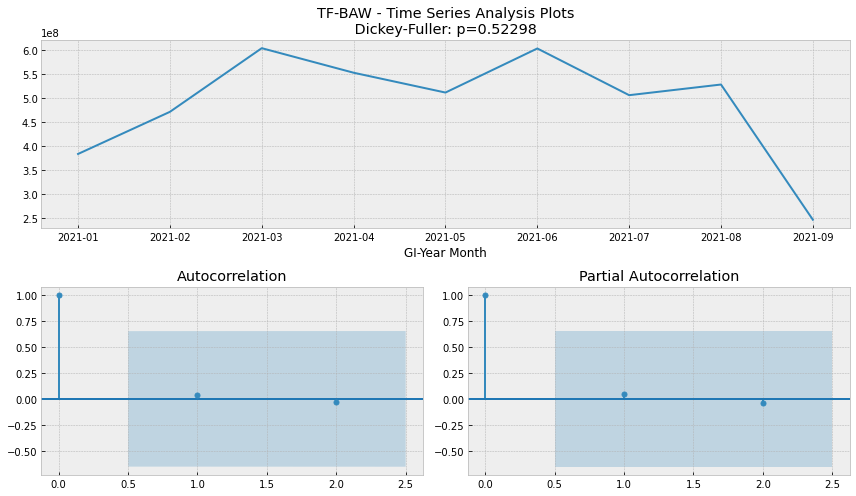

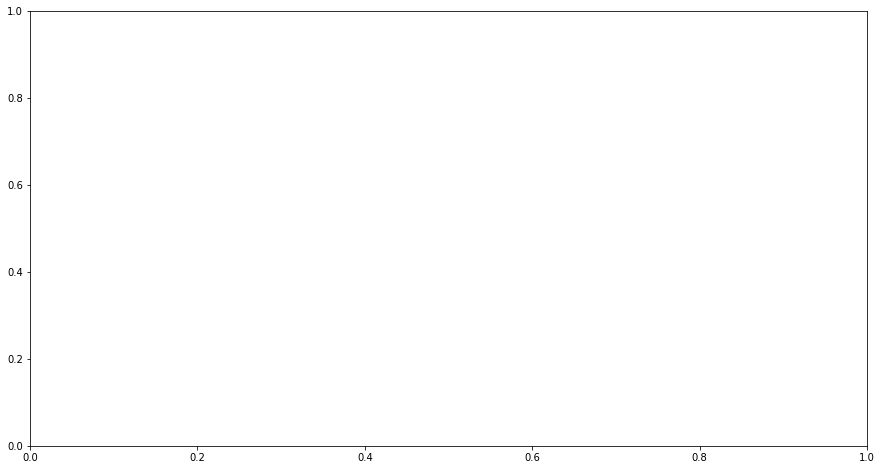

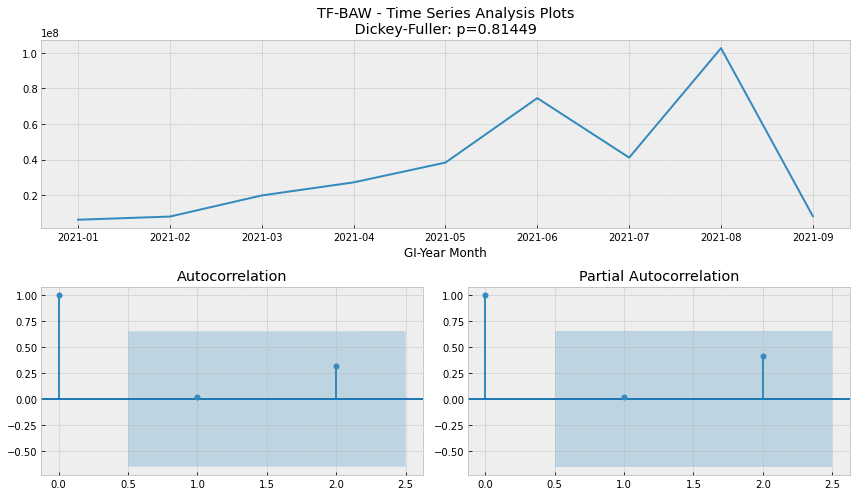

In [6]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags, figsize=(12, 7), style='bmh', category=i):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """

    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title( i + ' - Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f} '.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        fig.savefig(path_dir + "GI_Quantity_bar_autocorrelation_ "+i+".png")

product_sub_cat = GI_df['Package'].unique()
GI_SalesData = GI_df.copy()
GI_Category_Shipment = GI_SalesData[['Package','Total Quantity','GI-Year Month']]
GI_Category_Shipment['GI-Year Month'] = pd.to_datetime(GI_Category_Shipment['GI-Year Month'])

for i in product_sub_cat:
    plt.subplots(figsize=(15,8))
    GI_Category_Shipment_df = GI_Category_Shipment.loc[GI_Category_Shipment['Package'] == i]
    ax = (GI_Category_Shipment_df.groupby(GI_Category_Shipment_df['GI-Year Month'].dt.strftime('%Y-%m'))['Total Quantity'].sum().plot.bar(figsize=(15,6)))
    ax.set_xlabel("GI Shipment Dates",fontsize=15)
    ax.set_ylabel("Units",fontsize=15)
    ax.set_title("Chip Quantities shipment for " +i+ " package type ",fontsize=15)
    plt.savefig(path_dir + "GI_Quantity_bar_plot_components_ "+i+".png")
    plt.show()

for cate in product_sub_cat:
    plt.subplots(figsize=(15,8))
    GI_Category_Shipment_df = GI_Category_Shipment.loc[GI_Category_Shipment['Package'] == cate]
    ax = GI_Category_Shipment_df.groupby(GI_Category_Shipment_df['GI-Year Month'].dt.strftime('%Y-%m'))['Total Quantity'].sum()
    tsplot(ax, lags=2, category=cate)


### 2. Indexing all the dataframes with Date as index.

### 2.1 Sales Data

<ipython-input-132-749714cd9db1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GI_Category_Shipment['GI-Year Month'] = pd.to_datetime(GI_Category_Shipment['GI-Year Month'])
C:\Users\kuosh\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


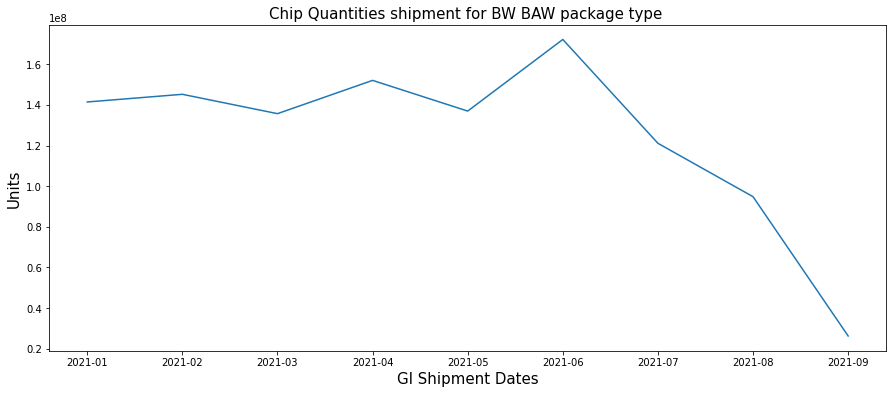

C:\Users\kuosh\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


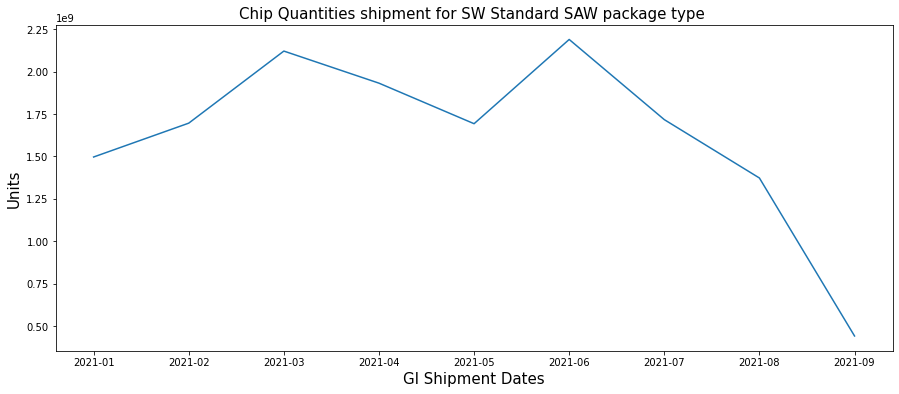

C:\Users\kuosh\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


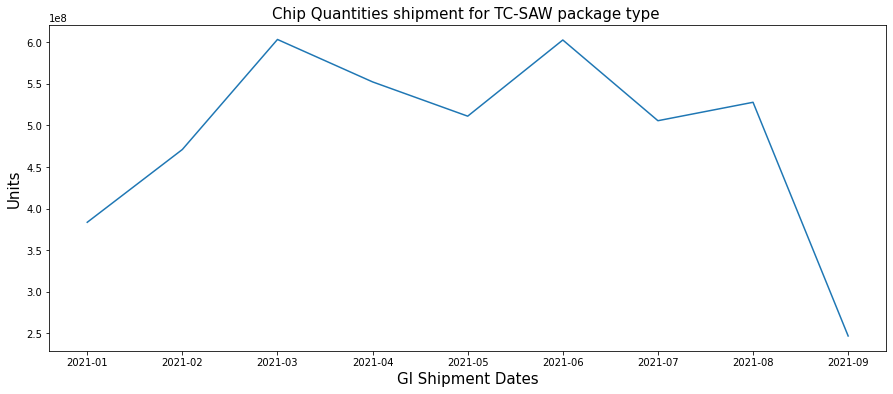

C:\Users\kuosh\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


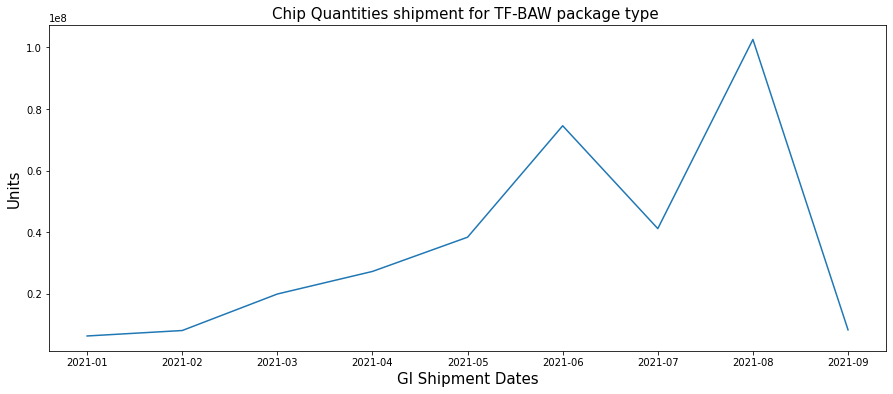

In [132]:
product_sub_cat = GI_df['Package'].unique()
GI_SalesData = GI_df.copy()
GI_Category_Shipment = GI_SalesData[['Package','Total Quantity','GI-Year Month']]
GI_Category_Shipment['GI-Year Month'] = pd.to_datetime(GI_Category_Shipment['GI-Year Month'])

for i in product_sub_cat:
    plt.subplots(figsize=(15,8))
    GI_Category_Shipment_df = GI_Category_Shipment.loc[GI_Category_Shipment['Package'] == i]
    ax = (GI_Category_Shipment_df.groupby(GI_Category_Shipment_df['GI-Year Month'].dt.strftime('%Y-%m'))['Total Quantity'].sum().plot(kind= 'line', figsize=(15,6)))
    ax.set_xlabel("GI Shipment Dates",fontsize=15)
    ax.set_ylabel("Units",fontsize=15)
    ax.set_title("Chip Quantities shipment for " +i+ " package type ",fontsize=15)
    plt.savefig(path_dir + "GI_Quantity_bar_plot_components_ "+i+".png")
    plt.show()

<ipython-input-137-4702042134f6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GI_Category_Order_Qty_Data['GI-Year Month'] = pd.to_datetime(GI_Category_Order_Qty_Data['GI-Year Month'])


GI-Year Month
2021-01    1496907800
2021-02    1696220380
2021-03    2120689008
2021-04    1931754871
2021-05    1692970100
2021-06    2189047200
2021-07    1716962700
2021-08    1373192000
2021-09     442928600
Name: Total Quantity, dtype: int64


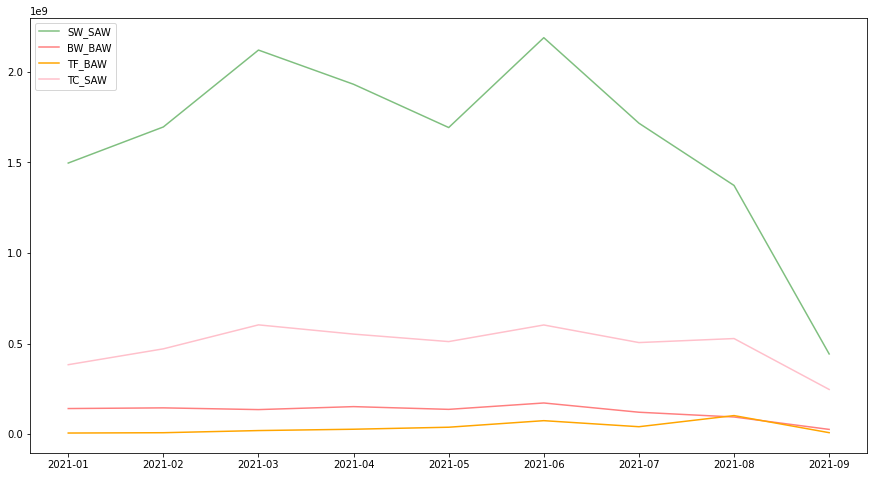

In [137]:
# Sales Data line graphs


product_sub_cat = GI_df['Package'].unique()
GI_package_type_df = GI_df.copy()

# GI_package_type_df.set_index('GI-Year Month', inplace=True)
GI_Category_Order_Qty_Data = GI_package_type_df[['Package','GI-Year Month','Total Quantity']]
GI_Category_Order_Qty_Data['GI-Year Month'] = pd.to_datetime(GI_Category_Order_Qty_Data['GI-Year Month'])
# GI_package_type_df.rename(columns={'Total Quantity' : 'Total_Quantity'}, inplace=True)


for i in product_sub_cat:
# 'BW BAW', 'SW Standard SAW', 'TC-SAW', 'TF-BAW'
    # product_Category_GI_prophet = GI_Category_Order_Qty_Data.groupby(['GI-Year Month','Package'])[['GI-Year Month','Package','Total Quantity',]].sum().reset_index()

    product_Category_demand_df = GI_Category_Order_Qty_Data.loc[GI_Category_Order_Qty_Data['Package'] == 'BW BAW']
    BW_BAW_product_Category_demand_ts_df = product_Category_demand_df.groupby(product_Category_demand_df['GI-Year Month'].dt.strftime('%Y-%m'))['Total Quantity'].sum()

for i in product_sub_cat:
# 'BW BAW', 'SW Standard SAW', 'TC-SAW', 'TF-BAW'
    # product_Category_GI_prophet = GI_Category_Order_Qty_Data.groupby(['GI-Year Month','Package'])[['GI-Year Month','Package','Total Quantity',]].sum().reset_index()
    product_Category_demand_df = GI_Category_Order_Qty_Data.loc[GI_Category_Order_Qty_Data['Package'] == 'SW Standard SAW']
    SW_SAW_product_Category_demand_ts_df = product_Category_demand_df.groupby(product_Category_demand_df['GI-Year Month'].dt.strftime('%Y-%m'))['Total Quantity'].sum()

for i in product_sub_cat:
# 'BW BAW', 'SW Standard SAW', 'TC-SAW', 'TF-BAW'
    # product_Category_GI_prophet = GI_Category_Order_Qty_Data.groupby(['GI-Year Month','Package'])[['GI-Year Month','Package','Total Quantity',]].sum().reset_index()
    product_Category_demand_df = GI_Category_Order_Qty_Data.loc[GI_Category_Order_Qty_Data['Package'] == 'TF-BAW']
    TF_BAW_product_Category_demand_ts_df = product_Category_demand_df.groupby(product_Category_demand_df['GI-Year Month'].dt.strftime('%Y-%m'))['Total Quantity'].sum()

for i in product_sub_cat:
# 'BW BAW', 'SW Standard SAW', 'TC-SAW', 'TF-BAW'
    # product_Category_GI_prophet = GI_Category_Order_Qty_Data.groupby(['GI-Year Month','Package'])[['GI-Year Month','Package','Total Quantity',]].sum().reset_index()
    product_Category_demand_df = GI_Category_Order_Qty_Data.loc[GI_Category_Order_Qty_Data['Package'] == 'TC-SAW']
    TC_SAW_product_Category_demand_ts_df = product_Category_demand_df.groupby(product_Category_demand_df['GI-Year Month'].dt.strftime('%Y-%m'))['Total Quantity'].sum()


print(SW_SAW_product_Category_demand_ts_df)
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(SW_SAW_product_Category_demand_ts_df, color='green', alpha=0.5, label='SW_SAW')
ax.plot(BW_BAW_product_Category_demand_ts_df, color='red', alpha=0.5, label='BW_BAW' )
ax.plot(TF_BAW_product_Category_demand_ts_df, color='orange',  label='TF_BAW' )
ax.plot(TC_SAW_product_Category_demand_ts_df, color='pink',  label='TC_SAW' )
ax.legend(loc = 'upper left')
fig.savefig(path_dir + "GI_Quantity_multiple_line_plot_components.png")
plt.show()


In [219]:
# Shipment Quantity statistical analysis

product_sub_cat = GI_df['Package'].unique()
GI_package_type_stats_df = GI_df.copy()


def quantile75(x):
    return x.quantile(0.75)

GI_Category_Order_Qty_Stats_Data = GI_package_type_stats_df[['Package','GI-Year Month','Total Quantity']]
GI_Category_Order_Qty_Stats_Data['GI-Year Month'] = pd.to_datetime(GI_Category_Order_Qty_Stats_Data['GI-Year Month'])



product_Category_stats_ts_df = GI_Category_Order_Qty_Stats_Data.groupby(['Package','GI-Year Month']).aggregate({ 'Total Quantity':[np.sum, np.mean, np.std, quantile75] })
product_Category_stats_ts_df.rename(columns={'Total Quantity' : 'Shipment Quantity'}, inplace=True)
product_Category_stats_ts_df = product_Category_stats_ts_df.applymap('{:,.2f}'.format)

product_Category_stats_ts_df








<ipython-input-219-610d2454bc53>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GI_Category_Order_Qty_Stats_Data['GI-Year Month'] = pd.to_datetime(GI_Category_Order_Qty_Stats_Data['GI-Year Month'])


Shipment Quantity                              \
                                            sum          mean           std   
Package         GI-Year Month                                                 
BW BAW          2021-01-01       141,447,200.00    238,931.08    537,737.67   
                2021-02-01       145,213,200.00    206,268.75    457,885.61   
                2021-03-01       135,692,800.00    232,350.68    456,263.04   
                2021-04-01       152,067,010.00    256,436.78    780,065.90   
                2021-05-01       136,962,200.00    276,133.47    831,813.58   
                2021-06-01       172,200,900.00    405,178.59  1,084,686.54   
                2021-07-01       121,107,000.00    384,466.67  1,074,833.88   
                2021-08-01        94,828,000.00    382,370.97    934,108.48   
                2021-09-01        26,298,000.00    271,113.40    626,403.61   
SW Standard SAW 2021-01-01     1,496,907,800.00    234,661.83    659,050.77   
                2021-02-01     1,696,220,380.00    258,530.77    683,853.58   
                2021-03-01     2,120,689,008.00    282,645.48    763,801.27   
                2021-04-01     1,931,754,871.00    272,116.48    765,281.25   
                2021-05-01     1,692,970,100.00    264,774.80    732,489.84   
                2021-06-01     2,189,047,200.00    365,206.41  1,006,811.19   
                2021-07-01     1,716,962,700.00    415,628.83  1,266,780.71   
                2021-08-01     1,373,192,000.00    466,595.99  1,667,179.88   
                2021-09-01       442,928,600.00    466,240.63  2,052,024.84   
TC-SAW          2021-01-01       383,567,800.00    250,207.31    690,375.97   
                2021-02-01       471,132,550.00    285,189.19    771,496.91   
                2021-03-01       603,455,300.00    320,475.46    923,728.99   
                2021-04-01       552,419,900.00    307,754.82    903,251.21   
                2021-05-01       511,196,300.00    313,425.08    803,879.14   
                2021-06-01       602,826,500.00    368,926.87  1,131,262.33   
                2021-07-01       505,740,000.00    449,147.42  1,844,992.24   
                2021-08-01       527,895,000.00    637,554.35  2,725,390.07   
                2021-09-01       246,830,000.00  1,041,476.79  3,909,498.12   
TF-BAW          2021-01-01         6,270,600.00     59,720.00     96,730.26   
                2021-02-01         8,043,000.00     76,600.00    105,989.44   
                2021-03-01        19,900,300.00     98,031.03    207,644.37   
                2021-04-01        27,237,200.00    146,436.56    303,483.24   
                2021-05-01        38,354,900.00    250,685.62    482,749.37   
                2021-06-01        74,551,800.00    392,377.89    845,830.84   
                2021-07-01        41,145,000.00    326,547.62    986,618.56   
                2021-08-01       102,580,000.00    854,833.33  1,904,954.06   
                2021-09-01         8,255,000.00    412,750.00    938,671.34   

                                           
                               quantile75  
Package         GI-Year Month              
BW BAW          2021-01-01     105,000.00  
                2021-02-01     115,000.00  
                2021-03-01     200,000.00  
                2021-04-01     120,000.00  
                2021-05-01     145,000.00  
                2021-06-01     245,000.00  
                2021-07-01     217,500.00  
                2021-08-01     200,000.00  
                2021-09-01     110,000.00  
SW Standard SAW 2021-01-01     130,000.00  
                2021-02-01     155,000.00  
                2021-03-01     160,000.00  
                2021-04-01     160,000.00  
                2021-05-01     150,000.00  
                2021-06-01     200,000.00  
                2021-07-01     200,000.00  
                2021-08-01     170,000.00  
                2021-09-01     120,000.00  
TC-SAW          2021-01-

In [ ]:
# We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.
from pylab import rcParams
import statsmodels.api as sm

GI_df_ts_Decomposition = GI_df.copy()

product_sub_cat = GI_df_ts_Decomposition['Package'].unique()
GI_df_ts_Decomposition = GI_df_ts_Decomposition[['GI-Year Month','Package','Total Quantity']]
GI_df_ts_Decomposition['GI-Year Month'] = pd.to_datetime(GI_df_ts_Decomposition['GI-Year Month'])
# print(GI_df_ts_Decomposition_ts.dropna(axis='columns'))
# GI_df_ts_Decomposition.set_index('GI-Year Month', inplace = True)
# superstoreSalesData_tsDecomposition
# GI_df_ts_Decomposition
# #
for i in product_sub_cat:
    product_Category_demand_ts_df = GI_df_ts_Decomposition.loc[GI_df_ts_Decomposition['Package'] == i]
    product_Category_demand_tsdf = product_Category_demand_ts_df.groupby('GI-Year Month')['Total Quantity'].sum().reset_index()
    product_Category_demand_tsdf.set_index('GI-Year Month',inplace = True)
    # product_Category_demand_tsdf.index
    y = product_Category_demand_tsdf['Total Quantity'].resample('D').mean()
    rcParams['figure.figsize'] = 15, 8
    decomposition = sm.tsa.seasonal_decompose(y, model='additive')
    fig = decomposition.plot()
    plt.title("Seasonality Decomposition for Product category - " + i)
    plt.show()


In [ ]:
from fbprophet import Prophet
# superstoreSalesData['Order Date'] = pd.to_datetime(superstoreSalesData['Order Date'])
# playoffs = pd.DataFrame({
#   'holiday': 'playoff',
#   'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
#                         '2010-01-24', '2010-02-07', '2011-01-08',
#                         '2013-01-12', '2014-01-12', '2014-01-19',
#                         '2014-02-02', '2015-01-11', '2016-01-17',
#                         '2016-01-24', '2016-02-07']),
#   'lower_window': 0,
#   'upper_window': 1,
# })
# superbowls = pd.DataFrame({
#   'holiday': 'superbowl',
#   'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
#   'lower_window': 0,
#   'upper_window': 1,
# })
# holidays = pd.concat((playoffs, superbowls))


# superstoreSalesData_prophet =superstoreSalesData.copy()
# product_sub_cat = superstoreSalesData_prophet['Product Category'].unique()
# superstoreSalesData_prophet['Order Date'] = pd.to_datetime(superstoreSalesData_prophet['Order Date'])
# superstore_Category_Order_Qty_Data = superstoreSalesData[['Order Date','Product Category','Sales']]

GI_df_data_prophet = GI_df.copy()
product_sub_cat = GI_df_data_prophet['Package'].unique()
GI_df_data_prophet['GI-Year Month'] = pd.to_datetime(GI_df_data_prophet['GI-Year Month'])
GI_df_data_prophet = GI_df_data_prophet[['Package','Total Quantity','GI-Year Month']]

for i in product_sub_cat:
    product_Category_GI_df = GI_df_data_prophet.loc[GI_df_data_prophet['Package'] == i]
    product_Category_GI_df.rename(columns={'GI-Year Month': 'ds', 'Total Quantity': 'y'}, inplace=True)


    product_Category_model = Prophet(interval_width=0.95,
                                    growth='linear',
                                    daily_seasonality=False,
                                    weekly_seasonality=False,
                                    yearly_seasonality=False )
                                    # seasonality_mode='multiplicative')
    product_Category_model.fit(product_Category_GI_df)

    product_Category_model_GI_forecast = product_Category_model.make_future_dataframe(
                                                                periods=2,
                                                                freq='M',
                                                                include_history=True)
    product_Category_model_forecast = product_Category_model.predict(product_Category_model_GI_forecast)

    plt.figure(figsize=(18, 6))
    product_Category_model.plot_components(product_Category_model_GI_forecast)

    plt.title( i +' GI Quantity')
    plt.savefig(path_dir + "GI_Quantity_fbprophet_plot_components_ "+i+".png")



In [ ]:
# predict and plot

import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


GI_df_data_prophet = GI_df.copy()
product_sub_cat = GI_df_data_prophet['Package'].unique()
GI_df_data_prophet['GI-Year Month'] = pd.to_datetime(GI_df_data_prophet['GI-Year Month'])
GI_df_data_prophet = GI_df_data_prophet[['Package','Total Quantity','GI-Year Month']]

for i in product_sub_cat:
    product_Category_GI_df = GI_df_data_prophet.loc[GI_df_data_prophet['Package'] == i]
    product_Category_GI_df.rename(columns={'GI-Year Month': 'ds', 'Total Quantity': 'y'}, inplace=True)


    product_Category_model = Prophet(interval_width=0.95,
#                                     growth='linear',
                                    daily_seasonality=False,
                                    weekly_seasonality=False,
                                    yearly_seasonality=False )
                                    # seasonality_mode='multiplicative')
    product_Category_model.fit(product_Category_GI_df)

    product_Category_model_GI_forecast = product_Category_model.make_future_dataframe(
                                                                periods=6,
                                                                freq='M',
                                                                include_history=True)
    product_Category_model_GI_forecast = product_Category_model.predict(product_Category_model_GI_forecast)

    plt.figure(figsize=(18, 6))

#     product_Category_model.plot(product_Category_model_GI_forecast)
    product_Category_model.plot(product_Category_model_GI_forecast, xlabel = 'GI Date', ylabel = 'GI Quantity')

    plt.title( i +' - GI Quantity Prediction')
    plt.savefig(path_dir + "GI_Quantity_fbprophet_forecast_predict_plot "+i+".png")



In [ ]:
# predict and export prediction & save it in Excel

import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


GI_df_data_prophet = GI_df.copy()
product_sub_cat = GI_df_data_prophet['Package'].unique()
GI_df_data_prophet['GI-Year Month'] = pd.to_datetime(GI_df_data_prophet['GI-Year Month'])
GI_df_data_prophet = GI_df_data_prophet[['Package','Total Quantity','GI-Year Month']]

for i in product_sub_cat:
    product_Category_GI_df = GI_df_data_prophet.loc[GI_df_data_prophet['Package'] == i]
    product_Category_GI_df.rename(columns={'GI-Year Month': 'ds', 'Total Quantity': 'y'}, inplace=True)


    product_Category_model = Prophet(interval_width=0.95,
#                                     growth='linear',
                                    daily_seasonality=False,
                                    weekly_seasonality=False,
                                    yearly_seasonality=False )
                                    # seasonality_mode='multiplicative')
    product_Category_model.fit(product_Category_GI_df)

    product_Category_model_GI_forecast = product_Category_model.make_future_dataframe(
                                                                periods=6,
                                                                freq='M',
                                                                include_history=True)
    product_Category_model_GI_forecast = product_Category_model.predict(product_Category_model_GI_forecast)

    writer_obj = pd.ExcelWriter(path_dir + 'GI_Order_fbprophet_prediction for ' + i + '.xlsx',
                            engine='xlsxwriter')
    product_Category_model_GI_forecast.to_excel(writer_obj , index=False, sheet_name="GI_Order_fbprophet_prediction", startrow=0, startcol=0)

    writer_obj.save()


In [ ]:
##### Construct time series in a pivot Table

GI_df_forecasting_pvt = GI_df.copy()

# GI_df_forecasting_pvt['GI-Year Month'] = pd.to_datetime(GI_df_forecasting_pvt['GI-Year Month'])
GI_df_forecasting_pvt = GI_df_forecasting_pvt.loc[GI_df_forecasting_pvt['Total Quantity'] > 0]

# GI_df_forecasting_pvt['GI-Year Month'] = GI_df_forecasting_pvt['GI-Year Month'].dt.strftime('%Y-%m')

GI_df_forecasting_pvt = pd.pivot_table(GI_df_forecasting_pvt, values=['Total Quantity'], index='GI-Year Month', columns='Package', aggfunc=np.sum)
GI_df_forecasting_pvt

In [ ]:
##### Construct time series in a pivot Table using PySpark Dataframe
import copy

Spark_GI_df_forecasting_pvt = copy.deepcopy(Spark_GI_df.schema)


Spark_GI_df_forecasting_pvt = Spark_GI_df_forecasting_pvt.filter("Total Quantity > 0").select("GI-Year Month","Package","Total Quantity").show()
# Spark_GI_df_forecasting_pvt = Spark_GI_df_forecasting_pvt.loc[Spark_GI_df_forecasting_pvt['Total Quantity'] > 0]

# GI_df_forecasting_pvt['GI-Year Month'] = GI_df_forecasting_pvt['GI-Year Month'].dt.strftime('%Y-%m')

# Spark_GI_df_forecasting_pvt = pd.pivot_table(Spark_GI_df_forecasting_pvt, values=['Total Quantity'], index='GI-Year Month', columns='Package', aggfunc=np.sum)
# Spark_GI_df_forecasting_pvt



##### Try with models
# Forecasting methods: Each product will be tested with different models to find out the models which suit with products' data patterns the most. Performance will be compared using RMSE. After the best model is picked, product forecast will be created by the model trained on the most recent data values.

In [ ]:
# function to split train and test set
# history length of a product starts from the month of first order, not all products have the same history length
# the function is to split train-test based on product's history length instead of dataset length

def train_test(data):
    myList = data.tolist()
    i = myList.index(next(filter(lambda x: x!=0, myList)))
    data = data.iloc[i:,]
    train = data[:int(0.75*(len(data)))]
    test = data[int(0.75*len(data)):]
    return train, test, data

# create data for forecasting
start = GI_df_forecasting_pvt.index.tolist()[-6]
fcastperiods = 12  # forecast periods is subject to change by forecast users
full_period = [start + pd.DateOffset(months=x) for x in range(0,fcastperiods)]
list(full_period)




##### ARIMA Model

In [ ]:

# plt.subplots(figsize=(15,8))
# GI_Category_Shipment_df = GI_Category_Shipment.loc[GI_Category_Shipment['Package'] == i]
# ax = (GI_Category_Shipment_df.groupby(GI_Category_Shipment_df['GI-Year Month'].dt.strftime('%Y-%m'))['Total Quantity'].sum().plot.bar(figsize=(15,6)))
# ax.set_xlabel("GI Shipment Dates",fontsize=15)
# ax.set_ylabel("Units",fontsize=15)
# ax.set_title("Chip Quantities shipment for " +i+ " package type ",fontsize=15)
# plt.savefig(path_dir + "GI_Quantity_bar_plot_components_ "+i+".png")
# plt.show()

from pmdarima.arima import auto_arima
from math import sqrt
import pandas as pd
from sklearn.metrics import mean_squared_error

# build function to run model for all columns
Arima = ['Arima']
ArimaFcastPerf = pd.DataFrame({'Models': Arima})
ArimaData = pd.DataFrame({'Period': full_period, 'Model': 'AutoRegressive Integrated Moving Average'})

def arimafcast(data):
    for i in data.columns:
        try:
            train, test, full = train_test(data[i])

            # Test model
            model_pred = auto_arima(train, start_p=0, start_q=0, max_p=6, max_q=6,
                                    m=3, seasonal=False, trace=True,
                                    error_action='ignore', suppress_warnings=True)
            model_pred.fit(train)
            pred = np.round(model_pred.predict(n_periods=len(test)))
            ArimaFcastPerf[i] = sqrt(mean_squared_error(test,pred))

            # Forecast model

            model_fc = auto_arima(full, start_p=0, start_q=0, max_p=6, max_q=6,
                                    m=3, seasonal=False, trace=True,
                                    error_action='ignore', suppress_warnings=True)
            model_fc.fit(full)
            forecast = np.round(model_fc.predict(n_periods=fcastperiods+6))
            ArimaData[i] = forecast[-fcastperiods:]

            # plt.figure(figsize =(10,10))
            # ax_ArimaData_plot = ArimaData.plot(kind='line', colormap='tab20c',title= i + 'ARIMA forecast', rot=45)
            # ax_ArimaData_plot.set_xlabel("GI Shipment Dates",fontsize=15)
            # ax_ArimaData_plot.set_ylabel("Units",fontsize=15)
            # plt.show()
        except:
            ArimaFcastPerf[i] = np.nan
            ArimaData[i] = np.nan
    return ArimaFcastPerf, ArimaData

ArimaFcastPerf, ArimaData = arimafcast(GI_df_forecasting_pvt)
# ArimaData['Period'] = ArimaData['Period'].dt.strftime("%Y/%m/%d")


# print(ArimaFcastPerf)
# writer_obj = pd.ExcelWriter(path_dir + 'ArimaData_performance.xlsx',
#                         engine='xlsxwriter')
# ArimaFcastPerf.to_excel(writer_obj , index=False, sheet_name="GI_ArimaData_performance", startrow=0, startcol=0)
# #
# writer_obj.save()

##### SARIMA Model

In [ ]:
# build function to run model for all columns
SArima = ['SARIMA']
SArimaFcastPerf = pd.DataFrame({'Models': SArima})
SArimaData = pd.DataFrame({'Period': full_period, 'Model': ' Seasonal Autoregressive Integrated Moving Average'})

def sarimafcast(data):
    for i in data.columns:
        try:
            train, test, full = train_test(data[i])

            # Test model
            model_pred = auto_arima(train, start_p=0, start_q=0, max_p=6, max_q=6,
                                  m=3, trace=True,
                                  error_action='ignore', suppress_warnings=True)
            model_pred.fit(train)
            pred = np.round(model_pred.predict(n_periods=len(test)))
            SArimaFcastPerf[i] = sqrt(mean_squared_error(test,pred))

            # Forecast model
            model_fc = auto_arima(full, start_p=0, start_q=0, max_p=6, max_q=6,
                                  m=3, trace=True,
                                  error_action='ignore', suppress_warnings=True)
            model_fc.fit(full)
            forecast = np.round(model_fc.predict(n_periods=fcastperiods+6))
            SArimaData[i] = forecast[-fcastperiods:]
        except:
            SArimaFcastPerf[i] = np.nan
            SArimaData[i] = np.nan
    return SArimaFcastPerf, SArimaData
sarimafcast(GI_df_forecasting_pvt)

##### Simple Exponential Smoothing

In [ ]:

# build function to run model for all columns
SES = ['Simple Exponential Smoothing']
SESFcastPerf = pd.DataFrame({'Models': SES})
SESData = pd.DataFrame({'Period': full_period, 'Model': 'Simple Exponential Smoothing'})

def sesfcast(data):
    for i in data.columns:
        try:
            train, test, full = train_test(data[i])

            # Test model
            model_pred = SimpleExpSmoothing(train).fit()
            pred = np.round(model_pred.forecast(len(test)))
            SESFcastPerf[i] = sqrt(mean_squared_error(test,pred))

            # Forecast model
            model_fc = SimpleExpSmoothing(full).fit()
            forecast = np.round(model_fc.forecast(fcastperiods+6))
            SESData[i] = forecast.tolist()[-fcastperiods:]
        except:
            SESFcastPerf[i] = np.nan
            SESData[i] = np.nan
    return SESFcastPerf, SESData
sesfcast(GI_df_forecasting_pvt)

##### Double Exponential Smoothing
Note: Double & Triple Exponential Smoothing only apply to positive data values

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# build function to run model for all columns
DES = ['Double Exponential Smoothing']
DESFcastPerf = pd.DataFrame({'Models': DES})
DESData = pd.DataFrame({'Period': full_period, 'Model': 'Double Exponential Smoothing - Holt Winter'})

def desfcast(data):
    for i in data.columns:
        try:
            train, test, full = train_test(data[i])
            if (train.min() != 0) and (test.min() !=0):
                # Test model
                model_pred = Holt(train,damped=True).fit()
                pred = np.round(model_pred.forecast(len(test)))
                DESFcastPerf[i] = sqrt(mean_squared_error(test,pred))

                # Forecast model
                model_fc = Holt(full,damped=True).fit()
                forecast = np.round(model_fc.forecast(fcastperiods+6))
                DESData[i] = forecast.tolist()[-fcastperiods:]
            else:
                DESFcastPerf[i] = np.nan
                DESData[i] = np.nan
        except:
            DESFcastPerf[i] = np.nan
            DESData[i] = np.nan
    return DESFcastPerf, DESData
desfcast(GI_df_forecasting_pvt)



##### Prophet

In [ ]:
from fbprophet import Prophet

# build function to run model for all columns
Prophetf = ['Prophet']
ProphetfFcastPerf = pd.DataFrame({'Models': Prophetf})
ProphetfData = pd.DataFrame({'Period': full_period, 'Model': 'Prophet'})

def prophetfForecast(data):
    for i in data.columns:
        try:
            myList = data[i].tolist()
            j = myList.index(next(filter(lambda x: x!=0, myList)))
            temp = data.iloc[j:,]
            temp['ds']=temp.index.astype('datetime64[ns]')
            temp = temp.reset_index(drop=True)
            temp = temp.rename(columns = {i:'y'})
            temp = temp.loc[:,['ds','y']]

            train = temp[:int(2/3*(len(temp)))]
            test = temp[int(2/3*len(temp)):]

            # Test model
            model_pred = Prophet()
            model_pred.fit(train)
            pred = model_pred.predict(test)
            ProphetfFcastPerf[i] = sqrt(mean_squared_error(test['y'].values,pred['yhat'].values))

            # Forecast model
            model_fc = Prophet()
            model_fc.fit(temp)

            fc_ds = ProphetfData.copy().set_index('Period')
            fc_ds['ds']=fc_ds.index.astype('datetime64[ns]')
            fc_ds = fc_ds.reset_index(drop=True).drop('Model',axis=1)

            forecast = model_fc.predict(fc_ds)
            ProphetfData[i] = np.round(forecast['yhat'].values)
        except:
            ProphetfFcastPerf[i] = np.nan
            ProphetfData[i] = np.nan
    return ProphetfFcastPerf, ProphetfData
prophetfForecast(GI_df_forecasting_pvt)

In [ ]:


#Combine all performance tables
Forecast_Perf = pd.concat([ArimaFcastPerf,SArimaFcastPerf,SESFcastPerf,DESFcastPerf]
                     ).set_index('Models')
Forecast_Perf






### Find the one with lowest RMSE. Choose the first one in case of more than 1 min values.

In [ ]:
# Find best model for each product
Model = pd.DataFrame()

for i in Forecast_Perf.columns:
    # Find the one with lowest RMSE. Choose the first one in case of more than 1 min values.
    Model[i] = [Forecast_Perf.loc[Forecast_Perf[i] == Forecast_Perf[i].min()].index[0]]
Model

In [ ]:
# Filter list of products per model in a dict model
model_dict = {}
model_list = ['Arima', 'SARIMA', 'Simple Exponential Smoothing', 'Double Exponential Smoothing', 'TES', 'Prophet']
for i in model_list:
    model_dict[i] = []

for i in Model.columns:
    for j in model_list:
        if any(Model[i] == j):
            model_dict[j].append(i)
model_dict



In [ ]:
# Extract forecast from equivalent models to the final forecast dataframe
AllForecast = pd.concat([ArimaData, SArimaData, SESData, DESData])
FinalForecast = pd.DataFrame({'Period': full_period})

for i in model_list:
    for j in model_dict[i]:
        FinalForecast[j] = AllForecast.loc[AllForecast['Model'] == i][j]
FinalForecast = FinalForecast.set_index('Period')


In [ ]:
# Combine historical and forecast data. Insert Data_Type column for filter purpose and move it to front.
HistoricalData = GI_df_forecasting_pvt[sorted(GI_df_forecasting_pvt)]
FinalForecast = FinalForecast[sorted(FinalForecast)]
FinalData = pd.concat([HistoricalData,FinalForecast])

FinalData['Period'] = np.nan
FinalData['Period'].iloc[:-fcastperiods] = 'Historical Data'
FinalData['Period'].iloc[-fcastperiods:] = 'Forecast'
co_list = FinalData.columns.tolist()
co_list.insert(0, co_list.pop(co_list.index('Period')))
FinalData = FinalData.reindex(columns= co_list)

# Save final data
#FinalData.to_csv("FinalData.csv")
FinalData

In [ ]:
# double or triple exponential smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
# prepare data

superstoreSalesData_holtwinters =superstoreSalesData.copy()
product_sub_cat = superstoreSalesData_holtwinters['Product Category'].unique()
superstoreSalesData_holtwinters['Order Date'] = pd.to_datetime(superstoreSalesData_holtwinters['Order Date'])
superstoreSalesData_holtwinters = superstoreSalesData_holtwinters[['Order Date','Product Category','Order Quantity']]
superstoreSalesData_holtwinters.set_index('Order Date', inplace = True)

for i in product_sub_cat:
    product_Category_demand_df = superstoreSalesData_holtwinters.loc[superstoreSalesData_holtwinters['Product Category'] == i]
#     product_Category_demand_df.rename(columns={'Order Date': 'ds', 'Order Quantity': 'y'}, inplace=True)

#     ExponentialSmoothing_model = ExponentialSmoothing(product_Category_demand_df)

#     model_fit = ExponentialSmoothing_model.fit(smoothing_level=alpha,optimized=False,use_brute=True)
    # make prediction
    # create class & fit model
    product_Category_demand_df['HWES2_ADD'] = ExponentialSmoothing(product_Category_demand_df['Order Quantity'],trend='add').fit().fittedvalues
    product_Category_demand_df['HWES2_MUL'] = ExponentialSmoothing(product_Category_demand_df['Order Quantity'],trend='mul').fit().fittedvalues
    product_Category_demand_df[['HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend - '+i + ' Product Category');


### 5. Splitting the data into Train, Test and Validation

###    Splitting the Target Variable into Train and Validation

In [ ]:
# split_validation_time = pd.to_datetime('2015-01-01')
# split_test_time = pd.to_datetime('2016-01-01')
# sales_data.drop(sales_data.columns[0],1,inplace = True)
# target_validation = sales_data.loc[sales_data.index >= split_validation_time]
# target_train = sales_data.loc[sales_data.index < split_validation_time]
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

# assign dependent and indepenedent variables
X = superstoreSalesData[['Product Category', 'Profit', 'Discount', 'income']]

y = superstoreSalesData['Order Quantity'].astype('int')


# data pre-processing
X = preprocessing.StandardScaler().fit(X).transform(X)
# use StratifiedShuffleSplit()
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2,
                             random_state=0)
sss.get_n_splits(X, y)


## 6.1. Identifing Feature Importance using ANOVA
## - Feature selection using SelectKBest to handle supervised problems

## 6.2. Checking for Multicolinearity using Variable Inflation Factor (VIF)

In [ ]:
x_var = merged_train
y_var = target_train
x_var_names = machine_learning_GI_df.columns
for i in range(0, len(x_var_names)):
    y = x_var[x_var_names[i]]
    x = x_var[x_var_names.drop(x_var_names[i])]
    lr1 = LinearRegression()
    rsq = lr1.fit(x,y).score(x,y)
    vif = round(1/(1-rsq),2)
    print (x_var_names[i], " VIF = " , vif)


# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
#
# # calculating VIF for each feature
# vif_data["
# VIF"] = [variance_inflation_factor(X.values, i)
#                        for i in range(len(X.columns))]
#  print(vif_data)


### Checking for Hetroscedasticity
### The Types Heteroskedasticity
## Unconditional
Unconditional heteroskedasticity is predictable and can relate to variables that are cyclical by nature.  This can include higher retail sales reported during the traditional holiday shopping period or the increase in air conditioner repair calls during warmer months.

Changes within the variance can be tied directly to the occurrence of particular events or predictive markers if the shifts are not traditionally seasonal. This can be related to an increase in smartphone sales with the release of a new model as the activity is cyclical based on the event but not necessarily determined by the season.

Heteroskedasticity can also relate to cases where the data approach a boundary—where the variance must necessarily be smaller because of the boundary's restricting the range of the data.

## Conditional
Conditional heteroskedasticity is not predictable by nature. There is no telltale sign that leads analysts to believe data will become more or less scattered at any point in time. Often, financial products are considered subject to conditional heteroskedasticity as not all changes can be attributed to specific events or seasonal changes.

A common application of conditional heteroskedasticity is to stock markets, where the volatility today is strongly related to volatility yesterday. This model explains periods of persistent high volatility and low volatility.


In [ ]:
# Heteroscedasticity check
from statsmodels.formula.api import ols
machine_learning_GI_df = GI_df.copy()
machine_learning_GI_df.rename({'GI-Year Month' : 'GI_Year_Month' }, axis='columns', inplace=True)
machine_learning_GI_df.rename({'Total Quantity': 'Total_Quantity'}, axis='columns', inplace=True)
# olsr_results = smf.ols('Order_Quantity ~ GI-Year_Month', machine_learning_GI_df).fit()
for i in product_sub_cat:
    machine_learning_GI_training_ts_df = machine_learning_GI_df.loc[machine_learning_GI_df['Package'] == i]
    machine_learning_GI_training_ts_df_per_package = machine_learning_GI_training_ts_df.groupby('GI_Year_Month')['Total_Quantity'].sum().reset_index()
    supply_chain_model = smf.ols('Total_Quantity ~ GI_Year_Month', data = machine_learning_GI_training_ts_df_per_package).fit()

    #Create a new pyplot figure to plot into
    fig = plt.figure()
    # Set the title of the plot
    fig.suptitle('Residual errors of OLS regession against Time_Period for '+ i)
    # #Set the X and Y axis labels
    plt.xlabel('Time_Period of GI (Goods-Issue) in YYYY-mm')
    plt.ylabel('Residual Errors')
    actual, = plt.plot(machine_learning_GI_training_ts_df_per_package['GI_Year_Month'], supply_chain_model.resid, 'go-', label='Residual Errors')
    plt.show()
    # ols_predicted_train = supply_chain_model.predict(merged_train)
    print(supply_chain_model.summary())

In [ ]:

## 5.1. Splitting the Target Variable into Train and Validation & use it for LSTM

In [ ]:
machine_learning_GI_df = GI_df.copy()

split_validation_time = pd.to_datetime('2021-07-01')
split_test_time = pd.to_datetime('2021-07-01')
# sales_data.drop(machine_learning_GI_df.columns[0],1,inplace = True)
# target_validation = machine_learning_GI_df.loc[machine_learning_GI_df['GI-Year Month'] >= split_validation_time]
# target_train = machine_learning_GI_df.loc[machine_learning_GI_df['GI-Year Month'] < split_validation_time]

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.models import Model, Sequential
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

LATENT_DIM = 5
BATCH_SIZE = 32
EPOCHS = 50

GI_LSTM_Data = GI_df.copy()
GI_LSTM_Data = GI_LSTM_Data[['Package','Total Quantity','GI-Year Month']]
GI_LSTM_Data['GI-Year Month'] = pd.to_datetime(GI_LSTM_Data['GI-Year Month'], format = '%Y-%m')
GI_LSTM_Data.set_index('GI-Year Month', inplace= True)

for i in product_sub_cat:
    LSTM_learning_GI_training = machine_learning_GI_df.loc[machine_learning_GI_df['Package'] == i]
    LSTM_learning_GI_training_df = LSTM_learning_GI_training.groupby('GI-Year Month')['Total Quantity'].sum().reset_index()
    model = Sequential()
    model.add(LSTM(4, input_shape=LSTM_learning_GI_training_df.shape))
    model.add(Dense(units=12, activation='relu', input_shape=(9,2)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    #
    # history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test),
    #                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

    # model_history = model.fit(
    #     LSTM_learning_GI_training_df["X"],
    #     LSTM_learning_GI_training_df["target"],
    #     batch_size=BATCH_SIZE,
    #     epochs=EPOCHS,
    #     validation_data=(valid_inputs["X"], valid_inputs["target"]),
    #     callbacks=[earlystop],
    #     verbose=1,
    # )
    # model.compile(optimizer="RMSprop", loss="mse")
    # earlystop = EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
    # model.summary()

    # split into train and test sets
    train_size = int(len(LSTM_learning_GI_training_df) * 0.67)
    test_size = len(LSTM_learning_GI_training_df) - train_size
    train, test = LSTM_learning_GI_training_df[0:train_size,:], LSTM_learning_GI_training_df[train_size:len(LSTM_learning_GI_training_df),:]

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    # make predictions
    trainPredict = model.predict(LSTM_learning_GI_training_df)
    plt.plot(trainPredict)
    plt.show()
    # model.summary()